### logistic regression

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.rc('font', size = 14)

import seaborn as sns
sns.set(style = 'white')

### shape, type, columns, missing value, rename, unique value

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [6]:
data.isna().all()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [7]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [8]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [9]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [13]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [14]:
data['education'] = np.where((data['education'] == 'basic.4y') | 
                             (data['education'] == 'basic.9y') |
                             (data['education'] == 'basic.6y'),
                             'Basic', data['education'])
data.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### data exploration
### distribution of y and relationship

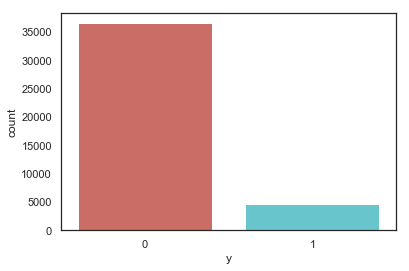

data is imbalanced


In [29]:
sns.countplot(x = 'y', data = data, palette = 'hls')
plt.show();
print('data is imbalanced')

In [23]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [24]:
# categorical
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [25]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [26]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


### visualizations
### relationship of y and categorical values and distribution
### barplot, hist

Text(0,0.5,'frequency of purchase')

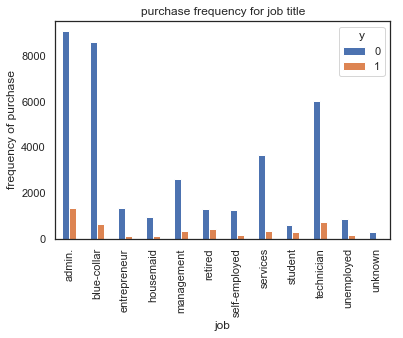

In [32]:
%matplotlib inline
sns.set(style = 'white')
pd.crosstab(data.job, data.y).plot(kind = 'bar')
plt.title('purchase frequency for job title')
plt.xlabel('job')
plt.ylabel('frequency of purchase')
# job title can be a good predictor

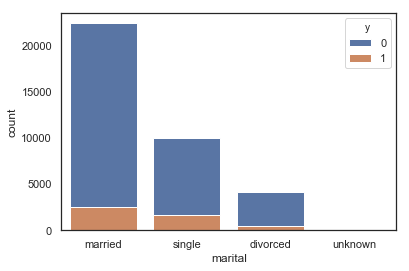

In [40]:
sns.countplot(x = 'marital', hue = 'y', data = data, dodge = False)

Text(0,0.5,'proportion of customers')

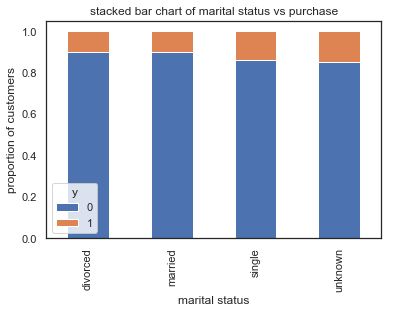

In [46]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('stacked bar chart of marital status vs purchase')
plt.xlabel('marital status')
plt.ylabel('proportion of customers')
# marital status does not seem a strong predictor

Text(0,0.5,'Proportion of Customers')

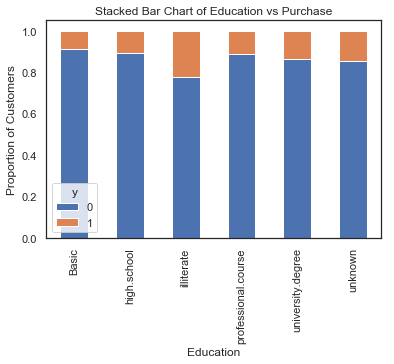

In [47]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
# education seems a good predictor

Text(0,0.5,'Frequency of Purchase')

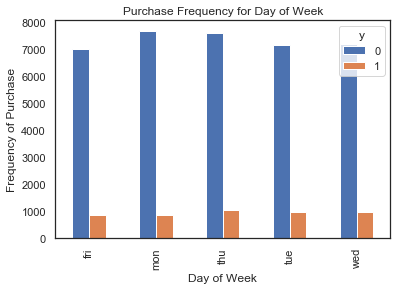

In [48]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
# may not good

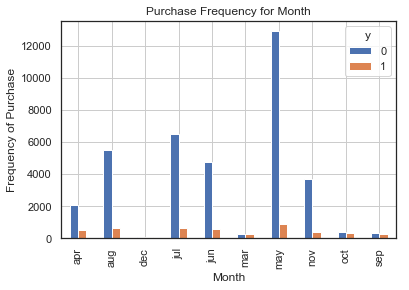

In [50]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.grid()
# may good

Text(0,0.5,'Frequency')

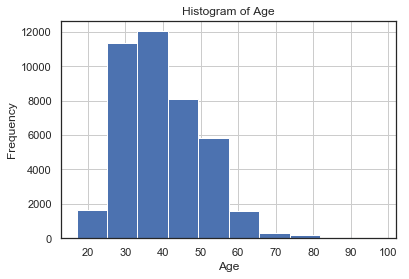

In [51]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Most of the customers of the bank in this dataset are in the age range of 30–40.

Text(0,0.5,'Frequency of Purchase')

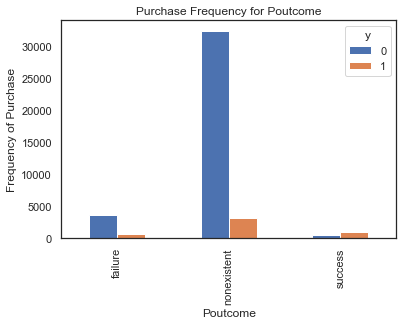

In [52]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
# seems good

### dummy variables

In [56]:
df = pd.get_dummies(data, prefix = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

### over-sampling using SMOTE
### sample dataset

In [ ]:
# Synthetic Minority Oversampling Technique
# Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
# Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [59]:
X = df.loc[:, df.columns != 'y']
Y = df.loc[:, df.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [61]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)

(41188, 62)
(28831, 61)
(12357, 61)


In [64]:
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = X_train.columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['y'])
print(os_data_X.shape)
print(os_data_y.shape)

(51134, 61)
(51134, 1)


In [65]:
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))

print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
# Now we have a perfect balanced data! 
# You may have noticed that I over-sampled only on the training data, 
# because by oversampling only on the training data, 
# none of the information in the test data is being used to create synthetic observations, 
# therefore, no information will bleed from test data into the model training.

### Recursive Feature Elimination
### sampling columns / features

In [ ]:
# repeatedly construct a model and choose either the best or worst performing feature, 
# setting the feature aside and then repeating the process with the rest of the features. 
# This process is applied until all features in the dataset are exhausted. 
# The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [76]:
y = df.y
X = df.drop('y', axis = 1)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_rfe = RFE(model, 20)
model_rfe_fit = model_rfe.fit(os_data_X, os_data_y.values.ravel())

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Inc

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [67]:
os_data_y.values

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [68]:
os_data_y.values.ravel()

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [79]:
print(model_rfe_fit.support_)
print(model_rfe_fit.ranking_)
# True or 1 are the features selected, totally 20

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[37 38 32 40 31 34 29 33 21 36 15  8  9 11 14 19 13 12 18 10 16 17  1  1
  1  1  1  1 41  1  1  1  3  2 42  1  1  1  1  1  1  5  4 22 24 25 27 26
 35 20 23 39 28  1  1  1  1  1  7  6 30]


In [88]:
c = os_data_X.columns
s = model_rfe_fit.support_.tolist()
cols = [c[i] for i in range(len(c)) if s[i] == True]
len(cols)

20

### logistic model
### eliminating p-vlue > 0.05

In [89]:
X = os_data_X[cols]
y = os_data_y['y']

import statsmodels.api as sm

model_log = sm.Logit(y, X).fit()
model_log.summary()

Optimization terminated successfully.
         Current function value: 0.457815
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51114
Method:                           MLE   Df Model:                           19
Date:                Sun, 03 Oct 2021   Pseudo R-squ.:                  0.3395
Time:                        16:13:50   Log-Likelihood:                -23410.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                  0.2589      0.059      4.389      0.000       0.143       0.375
marital_married                   0.7902      0.035     22.842      0.000       0.722       0.858
marital_single                    0.9814      0.038     25.532      0.000       0.906       1.057
marital_unknown                   0.3830      0.369      1.039      0.299      -0.340       1.106
education_Basic                  -2.1000      0.043    -48.917      0.000      -2.184      -2.016
education_high.school            -1.8791      0.044    -42.709      0.000      -1.965      -1.793
education_professional.course    -2.1131      0.054    -39.028      0.000      -2.219      -2.007
education_university.degree      -1.4365      0.039    -36.538      0.000      -1.514      -1.359
education_unknown                -2.0211      0.080    -25.253      0.000      -2.178      -1.864
housing_no                       -0.0894      0.037     -2.400      0.016      -0.162      -0.016
housing_unknown                   0.9036        nan        nan        nan         nan         nan
housing_yes                       0.1178      0.035      3.327      0.001       0.048       0.187
loan_no                           2.6993      0.038     71.091      0.000       2.625       2.774
loan_unknown                      0.9036        nan        nan        nan         nan         nan
loan_yes                          2.0474      0.057     35.867      0.000       1.936       2.159
day_of_week_fri                  -2.9542      0.048    -61.248      0.000      -3.049      -2.860
day_of_week_mon                  -3.1112      0.049    -63.873      0.000      -3.207      -3.016
day_of_week_thu                  -2.7511      0.045    -60.559      0.000      -2.840      -2.662
day_of_week_tue                  -2.8577      0.047    -60.554      0.000      -2.950      -2.765
day_of_week_wed                  -2.7599      0.046    -59.554      0.000      -2.851      -2.669
=================================================================================================
"""

In [98]:
# remove p-value > 0.05
X.drop(['housing_unknown', 'loan_unknown', 'marital_unknown'], axis = 1, inplace = True)

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
X.columns

Index(['marital_divorced', 'marital_married', 'marital_single',
       'education_Basic', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [101]:
model_log2 = sm.Logit(y, X).fit()
model_log2.summary()

Optimization terminated successfully.
         Current function value: 0.459126
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51117
Method:                           MLE   Df Model:                           16
Date:                Sun, 03 Oct 2021   Pseudo R-squ.:                  0.3376
Time:                        16:19:46   Log-Likelihood:                -23477.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                  0.2746      0.059      4.672      0.000       0.159       0.390
marital_married                   0.8067      0.034     23.543      0.000       0.740       0.874
marital_single                    0.9979      0.038     26.166      0.000       0.923       1.073
education_Basic                  -2.0463      0.042    -48.257      0.000      -2.129      -1.963
education_high.school            -1.8265      0.043    -41.990      0.000      -1.912      -1.741
education_professional.course    -2.0604      0.054    -38.317      0.000      -2.166      -1.955
education_university.degree      -1.3833      0.039    -35.700      0.000      -1.459      -1.307
education_unknown                -1.9694      0.080    -24.677      0.000      -2.126      -1.813
housing_no                       -0.1365      0.037     -3.709      0.000      -0.209      -0.064
housing_yes                       0.0714      0.035      2.043      0.041       0.003       0.140
loan_no                           2.6295      0.037     71.095      0.000       2.557       2.702
loan_yes                          1.9700      0.056     35.031      0.000       1.860       2.080
day_of_week_fri                  -2.8920      0.048    -60.735      0.000      -2.985      -2.799
day_of_week_mon                  -3.0514      0.048    -63.425      0.000      -3.146      -2.957
day_of_week_thu                  -2.6893      0.045    -60.083      0.000      -2.777      -2.602
day_of_week_tue                  -2.7961      0.047    -60.052      0.000      -2.887      -2.705
day_of_week_wed                  -2.6966      0.046    -59.028      0.000      -2.786      -2.607
=================================================================================================
"""

### prediction
### accuracy precision recall f1

In [102]:
from sklearn.metrics import confusion_matrix

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)

In [133]:
y_pred = logreg.predict(X_test)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      7666
           1       1.00      0.85      0.92      7675

    accuracy                           0.92     15341
   macro avg       0.93      0.92      0.92     15341
weighted avg       0.93      0.92      0.92     15341



### roc

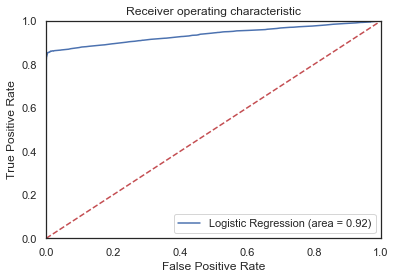

In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()